In [5]:
import pandas as pd
from googleapiclient.discovery import build

In [ ]:
# INSERT API KEY
API_KEY = 'YOUR API KEY'

In [7]:
# Initialize the YouTube Data API client
api_service_name = "youtube"
api_version = "v3"
youtube = build(api_service_name, api_version, developerKey=API_KEY)

In [8]:
# Specify the channel ID of the YouTube channel to retrieve data for

channel_id = [
    'UCN2bQLTTvNPZWCWU5TYghKA',  # Jessi's Channel
    'UCzycs8MqvIY4nXWwS-v4J9g',  # OOR
    'UCzgxx_DM2Dcb9Y1spb9mUJA',  # TWICE
    'UC9GtSLeksfK4yuJ_g1lgQbg',  # AESPA
    'UCNIy6zQyP7SuLEIaiwymfUA',  # Fujii Kaze
    'UCkB8HnJSDSJ2hkLQFUc-YrQ',  # King Gnu
    'UCUCeZaZeJbEYAAzvMgrKOPQ',  # Yonezu Kenshi
    'UChcgcbX3zMBwd0wTJyy2JlA',  # Hikaru Utada
    'UCRIgIJQWuBJ0Cv_VlU3USNA',  # Yorushika
    'UCLkAepWjdylmXSltofFvsYQ',  # BTS
    'UCfkXDY7vwkcJ8ddFGz8KusA'   # Seventeen
]

## Get Basic Info For Channels

In [9]:
def get_channels_info(channel_ids):
    # Join list of IDs into a comma-separated string
    ids_str = ",".join(channel_ids)

    # API call with expanded parts
    request = youtube.channels().list(
        part="snippet,statistics,brandingSettings,contentDetails,topicDetails",
        id=ids_str
    )
    response = request.execute()

    records = []

    for item in response.get("items", []):
        snippet = item.get("snippet", {})
        statistics = item.get("statistics", {})
        branding = item.get("brandingSettings", {}).get("channel", {})
        topics = item.get("topicDetails", {})

        raw_categories = topics.get("topicCategories", [])
        clean_categories = [url.split("/")[-1] for url in raw_categories]

        record = {
            "Channel ID": item.get("id"),
            "Title": snippet.get("title"),
            "Description": snippet.get("description"),
            "Custom URL": snippet.get("customUrl"),
            "Published At": snippet.get("publishedAt"),

            "View Count": int(statistics.get("viewCount", 0)),
            "Subscriber Count": int(statistics.get("subscriberCount", 0)),
            "Video Count": int(statistics.get("videoCount", 0)),

            "Keywords": branding.get("keywords"),

            "Topic Categories": ", ".join(clean_categories) if clean_categories else None,
        }

        records.append(record)

    df_channels = pd.DataFrame(records)
    return df_channels


In [11]:
get_channels_info(channel_id)

,Channel ID,Title,Description,Custom URL,Published At,View Count,Subscriber Count,Video Count,Keywords,Topic Categories
0,UCfkXDY7vwkcJ8ddFGz8KusA,SEVENTEEN,#SEVENTEEN Official Youtube\n,@pledis17,2012-11-16T08:20:35Z,7259865683,15000000,2994,None,"Music_of_Asia, Entertainment, Pop_music, Perfo..."
1,UCNIy6zQyP7SuLEIaiwymfUA,Fujii Kaze,musician,@fujiikaze,2008-01-05T01:47:20Z,2262880399,4720000,213,None,"Pop_music, Music, Music_of_Asia, Independent_m..."
2,UCkB8HnJSDSJ2hkLQFUc-YrQ,King Gnu official YouTube channel,常田大希、勢喜遊、新井和輝、井口理による4ピースジャパニーズバンド。\nオルタナティブと独自...,@kinggnuofficial,2018-12-18T07:26:47Z,2324919575,2740000,73,None,"Independent_music, Music_of_Asia, Pop_music, M..."
3,UChcgcbX3zMBwd0wTJyy2JlA,Hikaru Utada,Hikaru Utada Official YouTube Channel\n\n宇多田ヒカ...,@hikki,2005-09-24T02:53:37Z,1515785688,2310000,242,宇多田ヒカル 宇多田 ヒカル うただ ひかる utada hikaru ヒッキー Offic...,"Music, Music_of_Asia, Pop_music"
4,UCUCeZaZeJbEYAAzvMgrKOPQ,Kenshi Yonezu 米津玄師,Kenshi Yonezu / HACHI Official Channel\nhttps:...,@kenshiyonezu,2010-03-31T00:06:37Z,6775623236,7730000,258,"米津玄師 ハチ Kenshi Yonezu ""Kenshi Yonezu"" HACHI","Music, Entertainment, Music_of_Asia, Pop_music..."
5,UCzycs8MqvIY4nXWwS-v4J9g,ONE OK ROCK,ONE OK ROCK Official Channel,@oneokrock,2011-10-07T07:56:48Z,2471256809,4870000,456,"ONE OK ROCK ワンオク ""ONE OK ROCK オフィシャル"" ワンオクロック ...","Music_of_Asia, Music, Rock_music, Pop_music"
6,UCN2bQLTTvNPZWCWU5TYghKA,Jessi,,@jessiofficial,2019-08-16T07:17:09Z,1012141109,4150000,99,None,"Electronic_music, Pop_music, Music_of_Asia, Mu..."
7,UC9GtSLeksfK4yuJ_g1lgQbg,aespa,aespa 【Dirty Work】 \n\nWelcome to aespa Offici...,@aespa,2020-06-26T03:59:21.208624Z,4325744520,7490000,1279,aespa 에스파,"Pop_music, Lifestyle_(sociology), Music_of_Asi..."
8,UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,This is the official YouTube channel of BTS. 방...,@bts,2012-12-17T03:20:38Z,25276643711,80800000,2857,BTS 방탄 방탄소년단 빅히트 BANGTAN RM Jin SUGA j-hope Ji...,"Music, Music_of_Asia, Pop_music, Entertainment"
9,UCzgxx_DM2Dcb9Y1spb9mUJA,TWICE,TWICE Official YouTube Channel,@twice,2016-03-27T15:48:08Z,7539695381,18200000,2110,None,"Music_of_Asia, Entertainment, Television_progr..."


## Get Information for Video

##### Get All Videos from Channel

In [12]:
def get_all_video_ids_from_channel(channel_id):
    """Get all video IDs from a given channel."""
    video_ids = []
    next_page_token = None
    while True:
        request = youtube.search().list(
            part="id",
            channelId=channel_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()
        for item in response["items"]:
            if item["id"]["kind"] == "youtube#video":
                video_ids.append(item["id"]["videoId"])
        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break
    return video_ids

In [13]:
import time
from googleapiclient.errors import HttpError

def get_video_ids_limited(channel_id, max_results=10):
    """Fetch limited video IDs from a given channel."""
    try:
        request = youtube.search().list(
            part="id",
            channelId=channel_id,
            maxResults=max_results,
            order="date",  # gets recent videos
            type="video"
        )
        response = request.execute()
        return [
            item["id"]["videoId"]
            for item in response.get("items", [])
            if item["id"]["kind"] == "youtube#video"
        ]
    except HttpError as e:
        print(f"Error fetching videos from {channel_id}: {e}")
        return []

##### Get Video Information

In [14]:
def get_video_stats_batch(video_id_list):
    """Fetch video statistics in a batch."""
    if not video_id_list:
        return []

    try:
        request = youtube.videos().list(
            part="snippet,statistics,contentDetails",
            id=",".join(video_id_list)
        )
        response = request.execute()
    except HttpError as e:
        print(f"Error fetching stats: {e}")
        return []

    batch_data = []

    for item in response.get("items", []):
        snippet = item.get("snippet", {})
        statistics = item.get("statistics", {})
        content = item.get("contentDetails", {})

        try:
            duration = isodate.parse_duration(content.get("duration", "PT0S")).total_seconds()
        except:
            duration = None

        view_count = int(statistics.get("viewCount", 0))
        like_count = int(statistics.get("likeCount", 0))
        comment_count = int(statistics.get("commentCount", 0))

        engagement = ((like_count + comment_count) / view_count * 100) if view_count > 0 else None

        video_data = {
            "Video ID": item.get("id"),
            "Channel ID": snippet.get("channelId"),
            "Title": snippet.get("title"),
            "Description": snippet.get("description", ""),
            "Description Length": len(snippet.get("description", "")),
            "Publish Date": snippet.get("publishedAt"),
            "Duration (s)": duration,
            "View Count": view_count,
            "Like Count": like_count,
            "Comment Count": comment_count,
            "Engagement Rate (per 100 views)": engagement,
        }

        batch_data.append(video_data)

    return batch_data

##### Display Video Data

In [15]:
all_video_data = []

for cid in channel_id:
    video_ids = get_video_ids_limited(cid, max_results=50)  # Adjust this number if needed
    time.sleep(0.2)  # small delay to avoid rate limiting
    video_data = get_video_stats_batch(video_ids)
    all_video_data.extend(video_data)

# Display as DataFrame
df_videos = pd.DataFrame(all_video_data)
pd.set_option('display.max_columns', None)
display(df_videos)

,Video ID,Channel ID,Title,Description,Description Length,Publish Date,Duration (s),View Count,Like Count,Comment Count,Engagement Rate (per 100 views)
0,7hIwGSWjQFQ,UCN2bQLTTvNPZWCWU5TYghKA,Jessi (제시) - 'Newsflash' MV,Jessi (제시) - 'Newsflash' MV\n\nListen & downlo...,745,2025-06-27T04:00:18Z,None,1025483,32844,2853,3.480994
1,6H1-B7HX_sE,UCN2bQLTTvNPZWCWU5TYghKA,Jessi (제시) - 'Newsflash' MV Teaser,Jessi (제시) - 'Newsflash' MV Teaser\n📺️ 2025.06...,426,2025-06-25T12:00:20Z,None,91633,13297,1210,15.831633
2,bAynBoGBqEM,UCN2bQLTTvNPZWCWU5TYghKA,Jessi (제시) - 'Newsflash' 📺️ 2025.06.27 🔜 #제시 #...,Jessi (제시) - 'Newsflash' 📺️ 2025.06.27 🔜\n\n#제...,167,2025-06-23T12:01:09Z,None,15353,1453,169,10.564710
3,5p6fRhr2jzM,UCN2bQLTTvNPZWCWU5TYghKA,Jessi (제시) - ‘Gum’ with #청하 #CHUNGHA #GumChall...,🎧 Listen & download ‘Gum’ out now!\n-Melon: ht...,332,2023-11-10T04:42:50Z,None,3569410,0,1090,0.030537
4,5xJ-WlLg5w8,UCN2bQLTTvNPZWCWU5TYghKA,Jessi (제시) - ‘Gum’ with #입에서불나불나 @studiowaffle...,🎧 Listen & download ‘Gum’ out now!\n-Melon: ht...,332,2023-11-10T04:39:24Z,None,993014,0,185,0.018630
...,...,...,...,...,...,...,...,...,...,...,...
440,mtrh8rwkZ_s,UCfkXDY7vwkcJ8ddFGz8KusA,우리 막내는 그림을 잘 봐요 #나나민박 #세븐틴 #SEVENTEEN #NANA_bnb,,0,2025-06-21T03:01:21Z,None,204345,12017,60,5.910103
441,0nOpfN3NWnA,UCfkXDY7vwkcJ8ddFGz8KusA,[COVER] 도겸 - Butter-Fly (원곡 : Kōji Wada),[COVER] 도겸 - Butter-Fly (원곡 : Kōji Wada)\n\n#D...,77,2025-06-20T12:59:53Z,None,460170,60301,4293,14.036986
442,CcG2txvFQ-s,UCfkXDY7vwkcJ8ddFGz8KusA,[SPECIAL VIDEO] SEVENTEEN (세븐틴) - 만세 + Collabo...,[SPECIAL VIDEO] SEVENTEEN (세븐틴) - 만세 + Collabo...,95,2025-06-19T12:59:59Z,None,447658,50407,1504,11.596129
443,IJio9pn2b58,UCfkXDY7vwkcJ8ddFGz8KusA,[SPECIAL VIDEO] SEVENTEEN (세븐틴) - Transformer ...,[SPECIAL VIDEO] SEVENTEEN (세븐틴) - Transformer ...,90,2025-06-19T11:59:59Z,None,233905,38383,1676,17.126184


## Evaluate Feature Importance

##### Basic feature evaluation with few features

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Assume df_videos is your cleaned dataframe with necessary columns
df_model = df_videos.dropna(subset=["View Count", "Like Count", "Comment Count"])

# Define features and target
X = df_model[["View Count", "Like Count", "Comment Count"]]
y = df_model["View Count"]  # Change to target of interest if different

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Display results
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance Mean": result.importances_mean,
    "Importance Std": result.importances_std
}).sort_values(by="Importance Mean", ascending=False)

display(importances)


R² Score: 0.9972
RMSE: 433579.16


,Feature,Importance Mean,Importance Std
0,View Count,1.920063,0.245213
1,Like Count,0.000920,0.000481
2,Comment Count,-0.000652,0.000411


##### More features to evaluate

R² Score: 0.8803
RMSE: 4971517.94


,Feature,Importance Mean,Importance Std
0,Like Count,1.047591,0.089077
4,Engagement Rate (per 100 views),0.089735,0.023674
1,Comment Count,0.048030,0.010564
3,Description Length,0.005704,0.001110
2,Title Length,-0.017613,0.025964


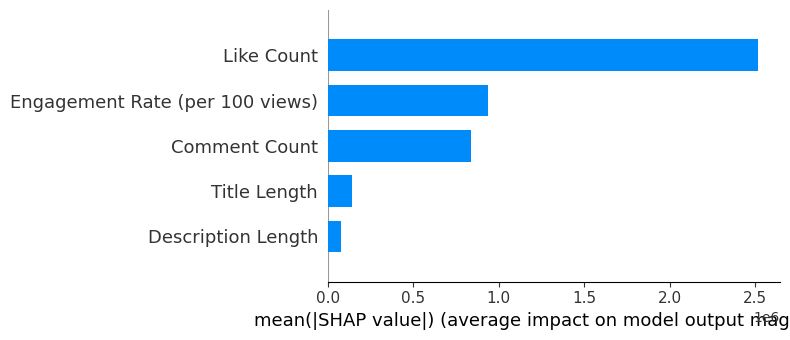

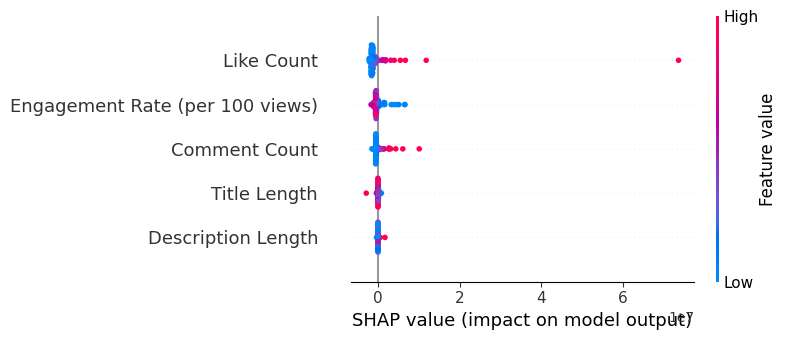

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_cols = [
    "Like Count", "Comment Count",
    "Title Length", "Description Length",
    "Engagement Rate (per 100 views)"
]

df_model = df_videos.dropna(subset=feature_cols + ["View Count"])

X = df_model[feature_cols]
y = df_model["View Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance Mean": result.importances_mean,
    "Importance Std": result.importances_std
}).sort_values(by="Importance Mean", ascending=False)

display(importances)

# SHAP Analysis
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Summary plot (dot swarm)
shap.summary_plot(shap_values, X_test)


## Export to Excel

In [21]:
# Drop duplicates before merge (if any)
df_videos = df_videos.drop(columns=[col for col in df_videos.columns if 'Published At' in col], errors='ignore')

# Merge and rename cleanly
df_videos = df_videos.merge(
    df_channels[["Channel ID", "Published At"]],
    on="Channel ID", how="left"
).rename(columns={"Published At": "Channel Published At"})

# Parse to datetime
df_videos["Channel Published At"] = pd.to_datetime(df_videos["Channel Published At"], errors='coerce').dt.tz_localize(None)
df_videos["Channel Age (days)"] = (pd.Timestamp.now() - df_videos["Channel Published At"]).dt.days

df_video_export = df_videos.copy()
df_channel_export = df_channels.copy()

# Export to Excel with multiple sheets
with pd.ExcelWriter('Youtube_data.xlsx', engine='xlsxwriter') as writer:
    df_video_export.to_excel(writer, sheet_name='Video Statistics', index=False)
    df_channel_export.to_excel(writer, sheet_name='Channel Info', index=False)